## Jarvis Challenge
<img src=https://community-challenge.netlify.app/icons/shirt.png width = 200 height = 200 align = right>
                                                                                                      
Bit Academy wil zijn Jarvis opdrachten gaan verbeteren om te zorgen voor een betere leeromgeving.<br>
Op basis van de feedback van studenten gaan we kijken welke opdrachten wel en niet herzien moeten worden.

Per gemaakte Jarvis opdracht kunnen studenten een rating geven. Als de gemiddelde rating van een <br>bepaalde opdracht te laag is, dan wordt de opdracht herzien aan de hand van de feedback.

Aan jou de taak om een programma te schrijven dat kijkt welke opdrachten moeten worden herzien. <br>
Gegeven is een Jarvis Ratings bestand. Hierin staan alle ratings van de opdrachten waar we naar <br>
gaan kijken. Open het bestand even in excel of in je editor om kijken hoe de data eruit ziet. <br>

Laat bij elke vraag zien hoe je aan je antwoord bent gekomen (zet comments bij je code). 


In [1]:
import pandas as pd
#Importeren van het csv bestand mbv pandas / read_csv
df = pd.read_csv('ratings.csv')
#Eerste inspectie van het DataFrame, display van de eerste 5 rijen
display(df.head(5))
#Inspecteren van de datatypes van de verschillende series
df.dtypes

,exercise,first_name,last_name,rating,date
0,Flex met boxen,Fergus,Crowther,5,2021-10-29
1,Commandline commands,Monica,Bartaloni,5,2021-01-05
2,Read that data,Prissie,Prangle,5,2021-10-26
3,Maak een kattenwebsite,Florida,Ambrogiotti,3,2021-07-17
4,Maak een kattenwebsite,Sherrie,Hadfield,4,2021-10-21


exercise      object
first_name    object
last_name     object
rating         int64
date          object
dtype: object

<table align="right">
<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
 </tr>
</table>
## 1 Ster: Hoeveel ratings zijn er totaal gegeven? 
Om te bepalen hoeveel ratings er zijn, is het belangrijk om te weten of er ontbrekende waarden zijn. Daarom eerst de vraag: ontbreken er ratings uit het DataFrame?

In [2]:
# Met de isna() method kan van de rating Series bepaald worden of er ontbrekende (NaN) waarden zijn
print(f"Er ontbreken {len(df[df['rating'].isna()])} ratings")

Er ontbreken 0 ratings


## Aantal ratings
Het aantal ontbrekende ratings blijkt 0 te zijn. Het aantal ratings is dan ook gelijk aan het aantal rijen: 1000

In [3]:
#Het aantal rijen in het DataFrame wordt mbv de len() functie geprint
print(f"Er zijn {len(df)} ratings.")

Er zijn 1000 ratings.


<table align="right">
<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
 </tr>
</table>

<h2 align="center"> 2 Sterren </h2>
<br>
<p align=center>Laat per opdracht zien hoeveel ratings de opdracht heeft en geef de namen van de opdrachten met een gemiddelde rating lager dan 3.
</p>

In [4]:
#Mbv groupby wordt het DataFrame naar de exercises geaggregeerd en het aantal in de kolom rating opgeteld door middel van de count() functie.
df.groupby(['exercise']).rating.count().reset_index().set_index('exercise')

,rating
exercise,
Commandline commands,189
Flex met boxen,193
Hover kan je gaan,216
Maak een kattenwebsite,198
Read that data,204


## Gemiddelde > 3
De exercises met een gemiddelde rating groter dan 3

In [5]:
#Wederom maak ik gebruik van groupby om te aggregeren. Het gemiddelde van de kolom rating wordt bepaald.
mean_rating_by_exercise = df.groupby(['exercise']).rating.mean()

#De rijen die als uitkomst True(rating > 3) hebben worden geselecteerd. 
mean_rating_by_exercise[mean_rating_by_exercise.values > 3].reset_index().set_index('exercise')

,rating
exercise,
Commandline commands,3.116402
Flex met boxen,3.704663
Hover kan je gaan,3.023148


<table align="right">
<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
        <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Orange_star.svg/1200px-Orange_star.svg.png" width = 25/> </td>
 </tr>
</table>

## 3 Sterren
Op 1 mei 2021 is de opdracht Flex met boxen herzien, heeft dat geleid tot betere ratings?

Allereerst zet ik de `date` column om van type `object` naar `Datetime`, aangezien dit handiger is bij het plotten van de grafieken. Ook sorteer ik op datum, om het tijdsverloop weer te geven.<br>

Daarna maak ik een DataFrame voor alleen de `Flex met boxen` exercise, welke ik vervolgens op de datum voor of na 1 mei sorteer.

In [6]:
#Omzetten `'date'` column naar type datetime
df['date'] = pd.to_datetime(df['date'])
#Sorteren op datum
df.sort_values(by='date', inplace=True)
#Selecteren op de exercise `Flex met boxen`, 
flex = pd.DataFrame(df[df['exercise'] == 'Flex met boxen'])
flex_after = flex[flex['date'] >= pd.to_datetime('2021-05-01 00:00:00')]
flex_before = flex[flex['date'] < pd.to_datetime('2021-05-01 00:00:00')]

## Betere ratings?
Om te bepalen of de verandering tot een verbetering heeft geleid, ga ik eerst kijken wat de functie describe() over beide te zeggen heeft

In [7]:
print("Voor 1 mei:")
display(flex_before['rating'].describe())
print("Na 1 mei:")
flex_after['rating'].describe()

Voor 1 mei:


count    85.000000
mean      2.776471
std       1.374742
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

Na 1 mei:


count    108.000000
mean       4.435185
std        0.811980
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

## Statistieken met hogere waarden
Gemiddelde, minimum, Q1, mediaan en Q3 zijn allen hoger geworden na 1 mei. De hierziening heeft inderdaad geleid tot betere ratings. In een boxplot is dit ook duidelijk te zien.

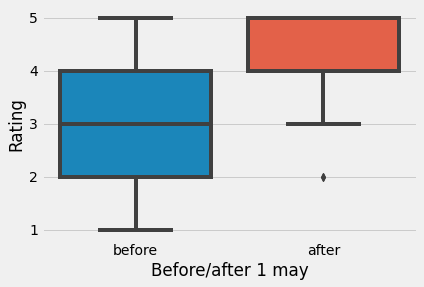

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
#Ik maak een extra kolom om aan te geven of de rij voor of na 1 mei is aangemaakt.
flex['may'] = flex.apply(lambda x: 'before' if (x['date'] < pd.to_datetime('2021-05-01')) else 'after', axis=1)
#Boxplot wordt geplot aan de hand hiervan
sns.boxplot(x=flex['may'],y=flex['rating'])
plt.xlabel('Before/after 1 may')
plt.ylabel('Rating')
plt.show()

## Frequentie distributie
Voor het visualiseren van de verdeling van de voor en na data kan de frequentie distributie geplot worden door middel van een bar plot. Dit maakt de verdeling in een opslag zeer duidelijk.

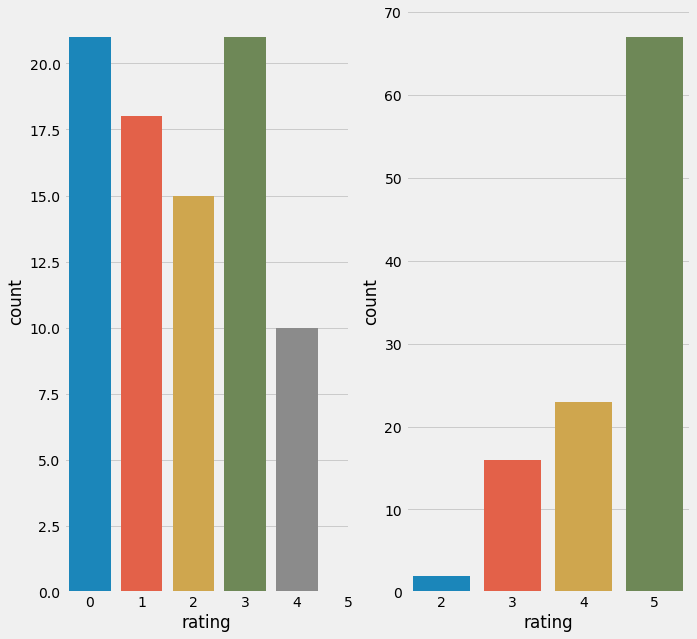

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.countplot(ax=ax1, data = flex_before, x = 'rating')
sns.countplot(ax=ax2, data = flex_after, x = 'rating')
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_xticklabels([0,1,2,3,4,5])
plt.show()


## Rolling mean
Om dit nog duidelijker te visualiseren heb ik ervoor gekozen een grafiek te maken met rolling mean, waarbij het gemiddelde en de mediaan over 15 waarden wordt uitgerekend

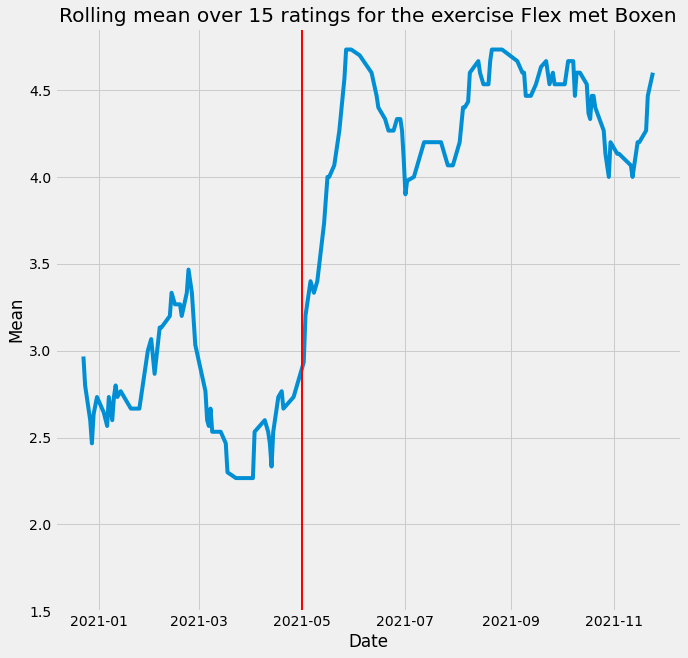

In [10]:
#Toewijzen rolling mean aan de waarden voor de Flex met boxen oefening
window_len = 15
flex['rolling_mean'] = flex['rating'].rolling(window = window_len).mean()

#plotten grafiek, met verticale lijn op 1 mei
plt.figure(figsize=(10,10))
sns.lineplot(x=flex['date'], y=flex['rolling_mean'], ci=False)
plt.title('Rolling mean over 15 ratings for the exercise Flex met Boxen')
plt.axvline(x=pd.to_datetime('2021-05-01'), color = 'red', linewidth=2)
plt.ylabel('Mean')
plt.xlabel('Date')
plt.ylim(1.5)
plt.show()

## Verschil met andere oefeningen
Om een goede vergelijking te maken met de andere oefeningen, kan het nog nuttig zijn om ook voor die een zelfde grafiek te maken. Daarvoor eerst het maken van een dictionary voor elke exercise

In [11]:
#Maken van een lege dict en aanmaken van de window length van de rolling mean
graph_dict = {}

#Voor elke unieke exercise in het dataframe wordt aan de bestaande dictionary een dataframe voor die exercise 
#toegevoegd met rolling mean met de naam van de exercise waarbij whitespace is vervangen door _
for n in df['exercise'].unique():
    
    calculate_mean = pd.DataFrame(df[df['exercise'] == n])
    
    calculate_mean['rolling_mean'] = calculate_mean['rating'].rolling(window = window_len).mean()
    
    var = n.replace(' ', '_').lower()
    graph_dict[var] = calculate_mean

## Plotten van de waardes in de dictionary
De 5 exercises samen worden geplot in een figuur.

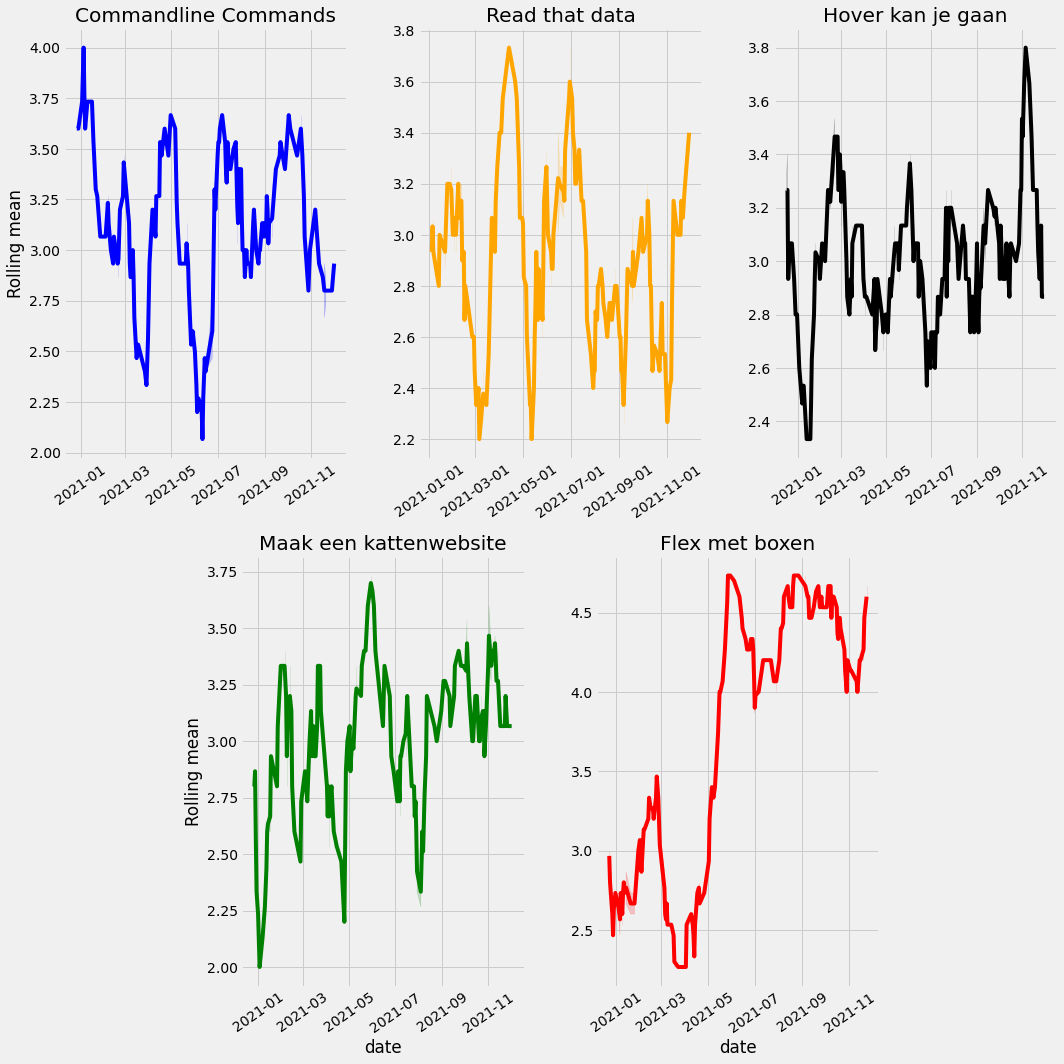

In [12]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

axes = [ax1, ax2, ax3, ax4, ax5]

sns.lineplot(x=graph_dict['commandline_commands']['date'], y=graph_dict['commandline_commands']['rolling_mean'], color = 'blue', ax=ax1)

sns.lineplot(x=graph_dict['read_that_data']['date'], y=graph_dict['read_that_data']['rolling_mean'], color = 'orange', ax=ax2)

sns.lineplot(x=graph_dict['hover_kan_je_gaan']['date'], y=graph_dict['hover_kan_je_gaan']['rolling_mean'], color = 'black', ax=ax3)

sns.lineplot(x=graph_dict['maak_een_kattenwebsite']['date'], y=graph_dict['maak_een_kattenwebsite']['rolling_mean'], color = 'green', ax=ax4)

sns.lineplot(x=graph_dict['flex_met_boxen']['date'], y=graph_dict['flex_met_boxen']['rolling_mean'], color = 'red', ax=ax5)

ax1.set_title('Commandline Commands')
ax2.set_title('Read that data')
ax3.set_title('Hover kan je gaan')
ax4.set_title('Maak een kattenwebsite')
ax5.set_title('Flex met boxen')

ax2.set_xticks([pd.to_datetime(n) for n in ['2021-01-01','2021-03-01','2021-05-01','2021-07-01','2021-09-01','2021-11-01']])

ax1.set_ylabel('Rolling mean')
ax4.set_ylabel('Rolling mean')

[n.set_ylabel('') for n in [ax2, ax3, ax5]]
[n.set_aspect('auto') for n in axes]
[n.tick_params(axis = 'x', rotation=35) for n in axes]
[n.set_xlabel('') for n in [ax1, ax2, ax3]]
plt.tight_layout()




plt.show()

## Conclusie
Op basis van bovenstaande statistieken, boxplot, countplots en de vergelijking tussen de verschillende exercises is duidelijk te zien dat er een positief verschil is voor de exercise `Flex met boxen` voor en na 1 mei. Verder is er voor geen van de andere exercises een dergelijk verschil terug te vinden.